In [1]:
import config
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_json(config.JSON_FILENAME)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35223 entries, 0 to 35222
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   35223 non-null  object
 1   Nama    35223 non-null  object
 2   Jam     35223 non-null  object
 3   start   35223 non-null  object
dtypes: object(4)
memory usage: 1.1+ MB


In [3]:
df.rename(columns={
    "title": "id",
    "Nama": "nama",
    "Jam": "jam",
    "start": "tanggal"
}, inplace=True)
df

,id,nama,jam,tanggal
0,00-009,Novi Pangestu,16.00-18.00,2023-03-30
1,00-027,Raymond Linggom A. Sitompul,10.00-12.00,2023-06-24
2,00-046,Yusita Kusumarini,16.00-18.00,2024-01-23
3,00-046,Yusita Kusumarini,16.00-18.00,2024-01-31
4,00-047,Christine,10.00-12.00,2023-04-04
...,...,...,...,...
35218,H15240050,JEREMIAH NATHANAEL SHALOM,10.00-12.00,2024-08-31
35219,H15240050,JEREMIAH NATHANAEL SHALOM,12.00-14.00,2024-09-03
35220,H15240050,JEREMIAH NATHANAEL SHALOM,16.00-18.00,2024-09-13
35221,H15240050,JEREMIAH NATHANAEL SHALOM,10.00-12.00,2024-09-17


In [4]:
df["jam_mulai"] = df["jam"].apply(lambda x: int(x[:2])).astype('int8')
df["tanggal"] = pd.to_datetime(df["tanggal"])
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35223 entries, 0 to 35222
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         35223 non-null  object        
 1   nama       35223 non-null  object        
 2   jam        35223 non-null  object        
 3   tanggal    35223 non-null  datetime64[ns]
 4   jam_mulai  35223 non-null  int8          
dtypes: datetime64[ns](1), int8(1), object(3)
memory usage: 1.1+ MB


,id,nama,jam,tanggal,jam_mulai
0,00-009,Novi Pangestu,16.00-18.00,2023-03-30,16
1,00-027,Raymond Linggom A. Sitompul,10.00-12.00,2023-06-24,10
2,00-046,Yusita Kusumarini,16.00-18.00,2024-01-23,16
3,00-046,Yusita Kusumarini,16.00-18.00,2024-01-31,16
4,00-047,Christine,10.00-12.00,2023-04-04,10
...,...,...,...,...,...
35218,H15240050,JEREMIAH NATHANAEL SHALOM,10.00-12.00,2024-08-31,10
35219,H15240050,JEREMIAH NATHANAEL SHALOM,12.00-14.00,2024-09-03,12
35220,H15240050,JEREMIAH NATHANAEL SHALOM,16.00-18.00,2024-09-13,16
35221,H15240050,JEREMIAH NATHANAEL SHALOM,10.00-12.00,2024-09-17,10


In [5]:
def adalah_mahasiswa(id):
    return len(id) == 9

def adalah_alumni(id):
    return len(id) == 8

def adalah_staf(id):
    return len(id) == 6

df["adalah_mahasiswa"] = df["id"].apply(adalah_mahasiswa)
df["adalah_alumni"] = df["id"].apply(adalah_alumni)
df["adalah_staf"] = df["id"].apply(adalah_staf)
df

,id,nama,jam,tanggal,jam_mulai,adalah_mahasiswa,adalah_alumni,adalah_staf
0,00-009,Novi Pangestu,16.00-18.00,2023-03-30,16,False,False,True
1,00-027,Raymond Linggom A. Sitompul,10.00-12.00,2023-06-24,10,False,False,True
2,00-046,Yusita Kusumarini,16.00-18.00,2024-01-23,16,False,False,True
3,00-046,Yusita Kusumarini,16.00-18.00,2024-01-31,16,False,False,True
4,00-047,Christine,10.00-12.00,2023-04-04,10,False,False,True
...,...,...,...,...,...,...,...,...
35218,H15240050,JEREMIAH NATHANAEL SHALOM,10.00-12.00,2024-08-31,10,True,False,False
35219,H15240050,JEREMIAH NATHANAEL SHALOM,12.00-14.00,2024-09-03,12,True,False,False
35220,H15240050,JEREMIAH NATHANAEL SHALOM,16.00-18.00,2024-09-13,16,True,False,False
35221,H15240050,JEREMIAH NATHANAEL SHALOM,10.00-12.00,2024-09-17,10,True,False,False


In [6]:
df_mahasiswa = df[df["adalah_mahasiswa"]]
df_alumni = df[df["adalah_alumni"]]
df_staf = df[df["adalah_staf"]]

print("Banyak data mahasiswa:", len(df_mahasiswa))
print("Banyak data alumni:", len(df_alumni))
print("Banyak data staf:", len(df_staf))

Banyak data mahasiswa: 28712
Banyak data alumni: 6
Banyak data staf: 6505


In [7]:
print(df_mahasiswa["id"].value_counts().to_string())

B12210070    328
D11220236    325
D12220015    315
E11210075    314
A11200002    280
E11210028    262
D12230050    258
D12210084    230
E12170171    228
A11220057    218
A11220035    215
A11220049    215
C14220158    208
C14210061    204
D11210512    193
C14220108    192
D12220121    186
E11200064    179
D11210584    176
D11210508    175
F11220017    169
E11210015    165
D11220267    165
F11220082    165
G11200029    162
A11200003    158
B21230005    152
A11220012    152
H13230024    152
B11200088    147
D12230147    146
C12180079    143
C14230063    142
F11220027    140
D11230136    136
E12220089    136
G11230011    135
C14210231    135
C14230088    130
D11210485    124
E12190232    120
E12210106    118
D11210172    118
C13200020    118
E11210072    115
F11220091    115
F11210065    114
D12210180    109
D21230041    109
D12210093    108
D11210438    107
C12200032    105
C14220223    105
D12210020    104
D11230251    101
A11220062    100
E12210099    100
C12210054     99
C14170119     

In [8]:
def angkatan_mahasiswa(row):
    if (not row["adalah_mahasiswa"]):
        return None
    return int(row["id"][3:5]) + 2000

def kode_fakultas_mahasiswa(row):
    if (not row["adalah_mahasiswa"]):
        return None
    return row["id"][0]

def strata_mahasiswa(row):
    if (not row["adalah_mahasiswa"]):
        return None
    return int(row["id"][1])

def tahun_belajar_mahasiswa(row):
    if (not row["adalah_mahasiswa"]):
        return None
    return row["tanggal"].year - row["angkatan_mahasiswa"]

df["angkatan_mahasiswa"] = df.apply(angkatan_mahasiswa, axis=1)
df["kode_fakultas_mahasiswa"] = df.apply(kode_fakultas_mahasiswa, axis=1)
df["strata_mahasiswa"] = df.apply(strata_mahasiswa, axis=1)
df["tahun_belajar_mahasiswa"] = df.apply(tahun_belajar_mahasiswa, axis=1)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35223 entries, 0 to 35222
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       35223 non-null  object        
 1   nama                     35223 non-null  object        
 2   jam                      35223 non-null  object        
 3   tanggal                  35223 non-null  datetime64[ns]
 4   jam_mulai                35223 non-null  int8          
 5   adalah_mahasiswa         35223 non-null  bool          
 6   adalah_alumni            35223 non-null  bool          
 7   adalah_staf              35223 non-null  bool          
 8   angkatan_mahasiswa       28712 non-null  float64       
 9   kode_fakultas_mahasiswa  28712 non-null  object        
 10  strata_mahasiswa         28712 non-null  float64       
 11  tahun_belajar_mahasiswa  28712 non-null  float64       
dtypes: bool(3), datetime64[ns](1), f

,id,nama,jam,tanggal,jam_mulai,adalah_mahasiswa,adalah_alumni,adalah_staf,angkatan_mahasiswa,kode_fakultas_mahasiswa,strata_mahasiswa,tahun_belajar_mahasiswa
0,00-009,Novi Pangestu,16.00-18.00,2023-03-30,16,False,False,True,NaN,None,NaN,NaN
1,00-027,Raymond Linggom A. Sitompul,10.00-12.00,2023-06-24,10,False,False,True,NaN,None,NaN,NaN
2,00-046,Yusita Kusumarini,16.00-18.00,2024-01-23,16,False,False,True,NaN,None,NaN,NaN
3,00-046,Yusita Kusumarini,16.00-18.00,2024-01-31,16,False,False,True,NaN,None,NaN,NaN
4,00-047,Christine,10.00-12.00,2023-04-04,10,False,False,True,NaN,None,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
35218,H15240050,JEREMIAH NATHANAEL SHALOM,10.00-12.00,2024-08-31,10,True,False,False,2024.0,H,1.0,0.0
35219,H15240050,JEREMIAH NATHANAEL SHALOM,12.00-14.00,2024-09-03,12,True,False,False,2024.0,H,1.0,0.0
35220,H15240050,JEREMIAH NATHANAEL SHALOM,16.00-18.00,2024-09-13,16,True,False,False,2024.0,H,1.0,0.0
35221,H15240050,JEREMIAH NATHANAEL SHALOM,10.00-12.00,2024-09-17,10,True,False,False,2024.0,H,1.0,0.0


<AxesSubplot: title={'center': 'Frekuensi reservasi berdasarkan tahun dan bulan'}, xlabel='(tahun, bulan)', ylabel='frekuensi'>

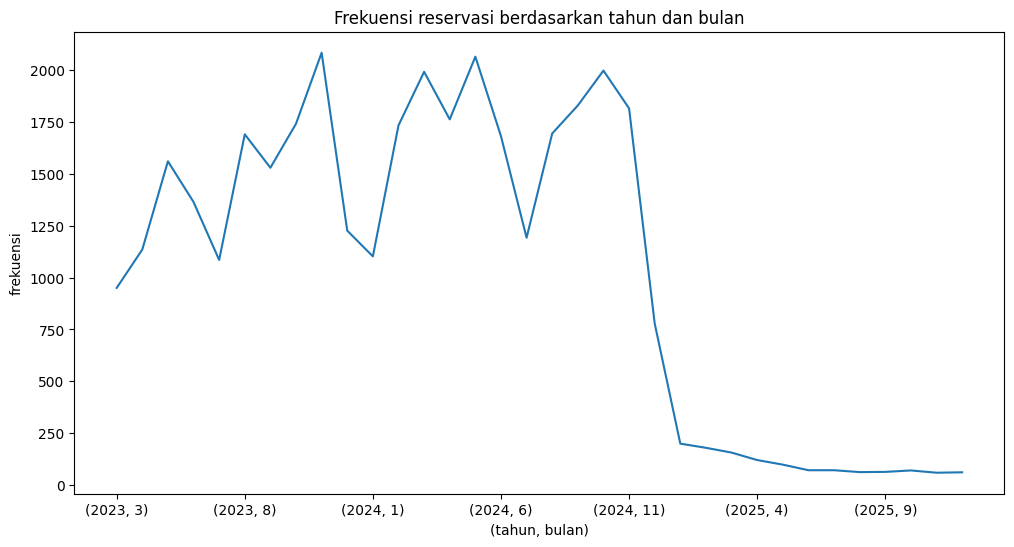

In [9]:
df.groupby([df["tanggal"].dt.year, df["tanggal"].dt.month]).size()\
    .plot(title="Frekuensi reservasi berdasarkan tahun dan bulan", kind="line", figsize=(12, 6), xlabel="(tahun, bulan)", ylabel="frekuensi")

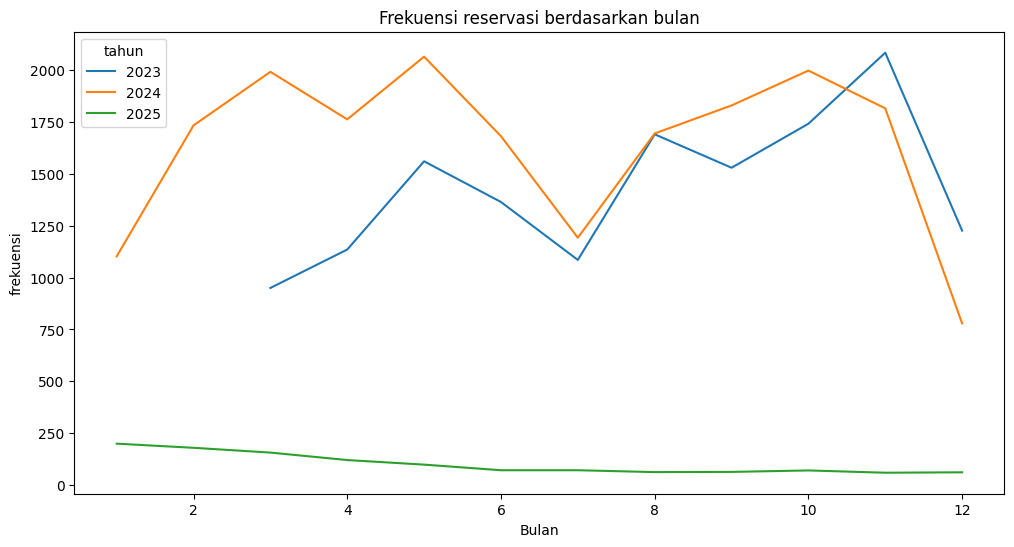

In [10]:
dfp = pd.pivot_table(data=df, index=df.tanggal.dt.month, columns=df.tanggal.dt.year, values='id', aggfunc='count')
ax = dfp.plot(title="Frekuensi reservasi berdasarkan bulan", kind='line', figsize=(12, 6), ylabel='frekuensi', xlabel='Bulan')
_ = ax.legend(title="tahun", loc='upper left')

Memuncak di sekitar bulan 4-6 dan 10-11. Paling sedikit pada sekitar bulan 7 dan 12 yaitu saat libur kuliah.

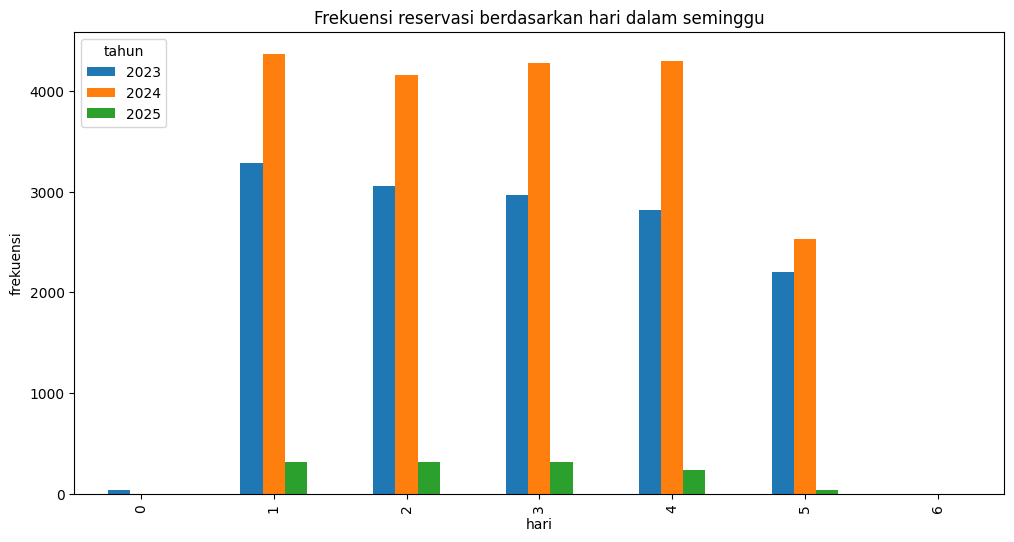

In [11]:
dfp = pd.pivot_table(data=df, index=df.tanggal.dt.day_of_week, columns=df.tanggal.dt.year, values='id', aggfunc='count')
ax = dfp.plot(title="Frekuensi reservasi berdasarkan hari dalam seminggu", kind='bar', figsize=(12, 6), ylabel='frekuensi', xlabel='hari')
_ = ax.legend(title="tahun", loc='upper left')

Reservasi umumnya lebih banyak pada hari-hari di awal minggu, dan hanya sedikit di hari Sabtu.
Menariknya, Skyfit biasanya tutup pada hari Senin, tapi kok ada data reservasi yang di hari Senin?

In [12]:
df[df.tanggal.dt.day_of_week==0]

,id,nama,jam,tanggal,jam_mulai,adalah_mahasiswa,adalah_alumni,adalah_staf,angkatan_mahasiswa,kode_fakultas_mahasiswa,strata_mahasiswa,tahun_belajar_mahasiswa
534,04-027,Saarce Elsye Hatane,16.00-18.00,2023-03-20,16,False,False,True,NaN,None,NaN,NaN
924,01-065,Rudy Setiawan,16.00-18.00,2023-03-20,16,False,False,True,NaN,None,NaN,NaN
2111,20-017,Hendri Kwistianus,16.00-18.00,2023-03-27,16,False,False,True,NaN,None,NaN,NaN
6247,B11200076,NICOLAS SANTOSO,12.00-14.00,2023-03-20,12,True,False,False,2020.0,B,1.0,3.0
6348,B11200106,ARIYA SUMANO CANDRAPUTTA,12.00-14.00,2023-03-20,12,True,False,False,2020.0,B,1.0,3.0
6443,B11220040,ALFA JULIO ZADRAKH GABRIEL PASARIBU,16.00-18.00,2023-03-20,16,True,False,False,2022.0,B,1.0,1.0
8775,C13220025,JESSEN CHRISTIAN BUNTORO,16.00-18.00,2023-03-20,16,True,False,False,2022.0,C,1.0,1.0
9901,C14210047,VINCENTIUS IMMANUEL TIRO,16.00-18.00,2023-03-20,16,True,False,False,2021.0,C,1.0,2.0
10354,22-009,Ganda Charisma Kristi,16.00-18.00,2023-03-20,16,False,False,True,NaN,None,NaN,NaN
11979,C14220158,AURUM NURAGA WILIONG,12.00-14.00,2023-03-20,12,True,False,False,2022.0,C,1.0,1.0


Reservasi di hari Senin hanya pernah dilakukan di tanggal 20 Maret 2024 dan 27 Maret 2024. Hipotesis: kasus khusus saat baru buka.

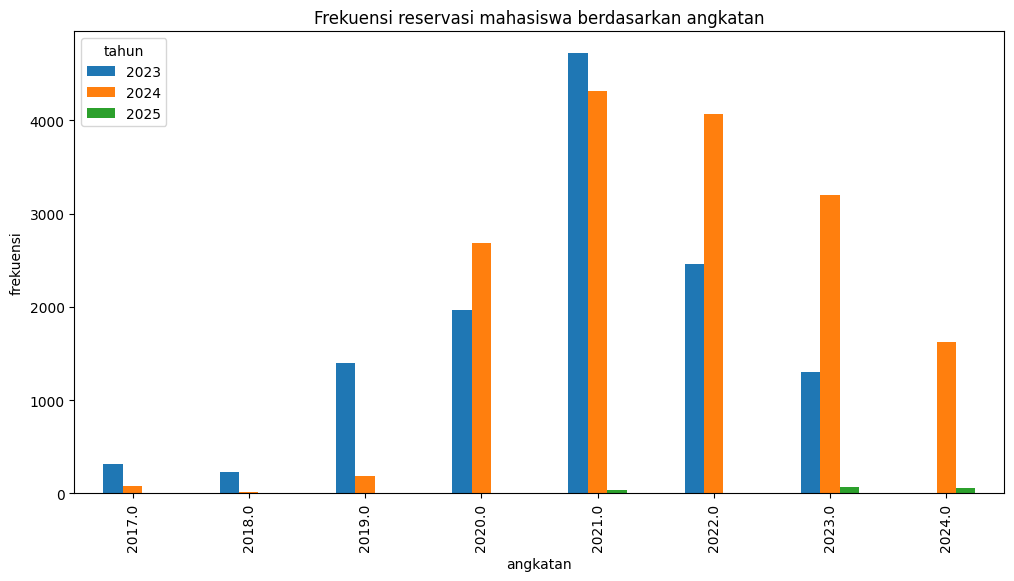

In [13]:
dfp = pd.pivot_table(data=df_mahasiswa, index=df["angkatan_mahasiswa"], columns=df.tanggal.dt.year, values='id', aggfunc='count')
ax = dfp.plot(title="Frekuensi reservasi mahasiswa berdasarkan angkatan", kind='bar', figsize=(12, 6), ylabel='frekuensi', xlabel='angkatan')
_ = ax.legend(title="tahun", loc='upper left')

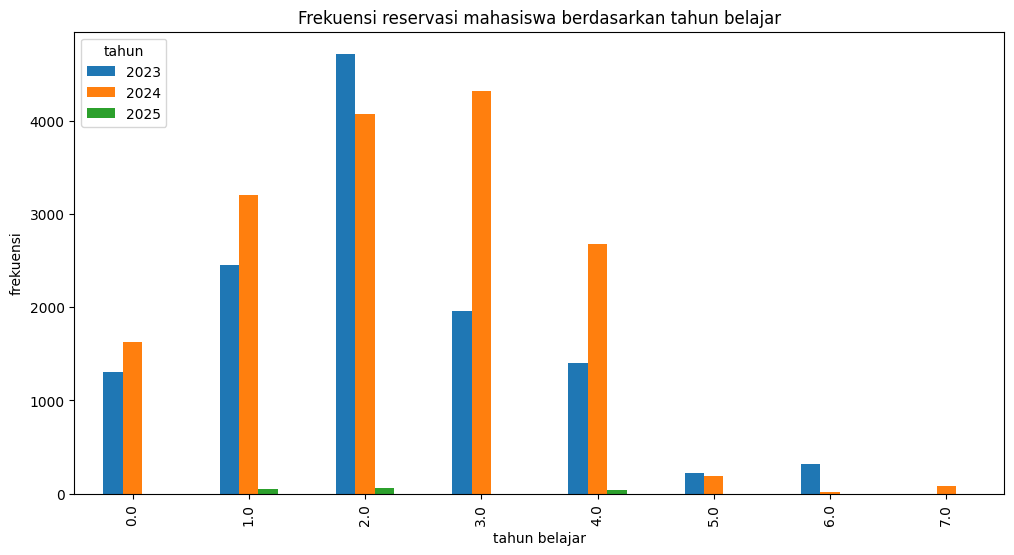

In [14]:
dfp = pd.pivot_table(data=df_mahasiswa, index=df["tahun_belajar_mahasiswa"], columns=df.tanggal.dt.year, values='id', aggfunc='count')
ax = dfp.plot(title="Frekuensi reservasi mahasiswa berdasarkan tahun belajar", kind='bar', figsize=(12, 6), ylabel='frekuensi', xlabel='tahun belajar')
_ = ax.legend(title="tahun", loc='upper left')